In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)

from algorithms import *
from utils import *

# Maze 1 - Test

(147, 220, 3)


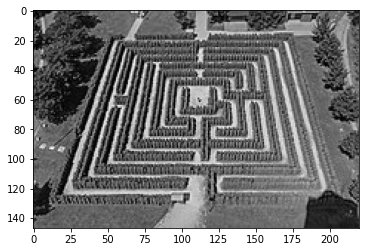

In [2]:
image_rgb = cv2.imread('images/maze_1.jpg', cv2.IMREAD_COLOR)
print(image_rgb.shape)

image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
imshow(image, cmap='gray')

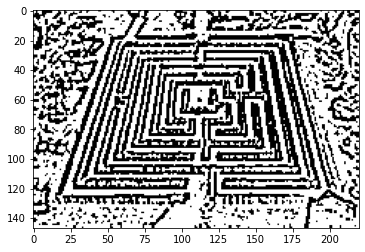

In [3]:
kernel_side = 5
kernel = (kernel_side, kernel_side)
stddev = 1.0

thresholded = cv2.GaussianBlur(image, kernel, stddev)

thresholded = cv2.adaptiveThreshold(
    thresholded,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=kernel_side,
    C=2
)

imshow(thresholded, cmap='gray')

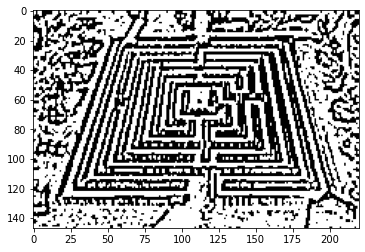

In [4]:
thresholded = cv2.erode(thresholded, kernel)
thresholded = cv2.dilate(thresholded, kernel)

imshow(thresholded, cmap='gray')

(115, 147)


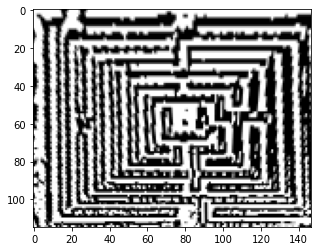

True

In [9]:
cropped, M_inv = crop(thresholded, np.float32([[50, 15], [175, 15], [5, 130], [205, 130]]))
print(cropped.shape)
imshow(cropped, cmap='gray')

cv2.imwrite('images/cropped/cropped.jpg', cropped)

Solution has been found!


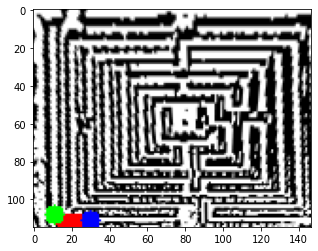

In [6]:
start = 108, 11
finish = 111, 30

bfs = BFS(cropped, start=start, finish=finish)
bfs.solve()

solved = bfs.draw(cv2.cvtColor(cropped, cv2.COLOR_GRAY2RGB), thickness=5)
imshow(solved)

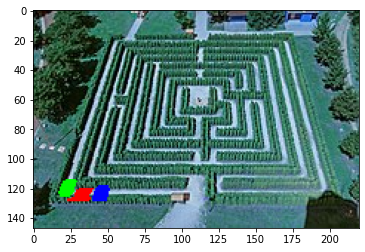

In [7]:
result = draw_solution_on_source_image(image_rgb, solved, M_inv)
imshow(result)

# Maze 2 - Test

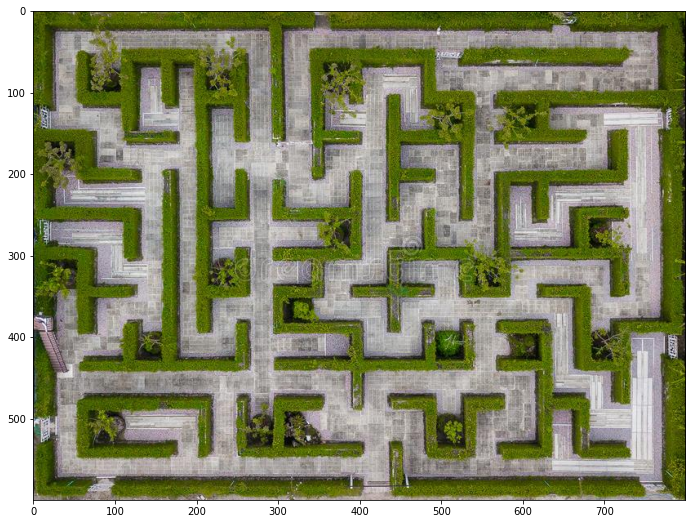

In [99]:
# MAZE 2

blur_k = None
thresh_k = None
erosion_k = None
dilation_k = None
step = 16

image2 = cv2.imread('images/maze_2.jpg') 
source_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb, cmap='gray')

In [100]:
thresh_img = threshold(source_gray, blur_k, thresh_k)
morph_img = morphological(thresh_img, erosion_k, dilation_k)
#cropped, M_inv = crop(morph_img, np.float32([[47, 38], [47, 450], [560, 38], [560, 450]]))
#print(cropped.shape)
#imshow(cropped, cmap='gray')
cropped = morph_img

True

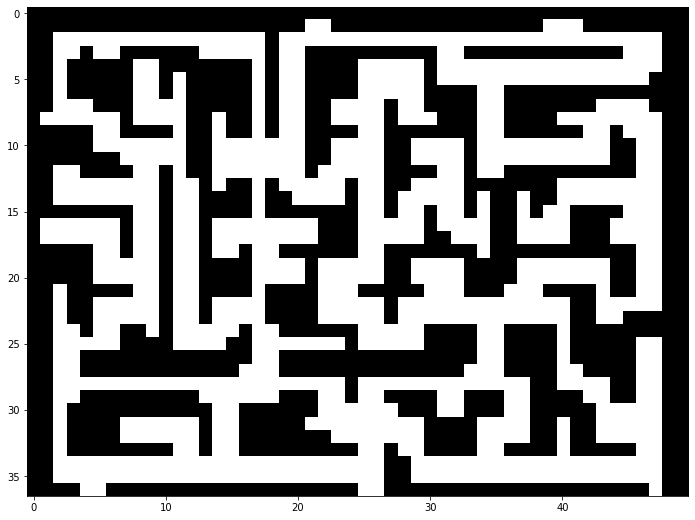

In [101]:
resized_img = resize_image(cropped, step)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')
cv2.imwrite('images/cropped/cropped_2.jpg', image_maze_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!


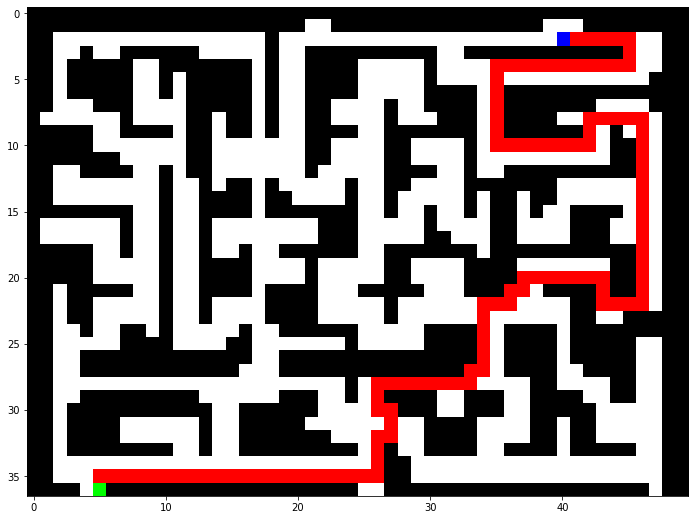

In [102]:
start = 36, 5
finish = 2, 40

bfs = A_Star(image_maze_gray, start=start, finish=finish, heuristic='complex')
solution = bfs.solve()

solved = bfs.draw(cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB), thickness=1)
imshow(solved)

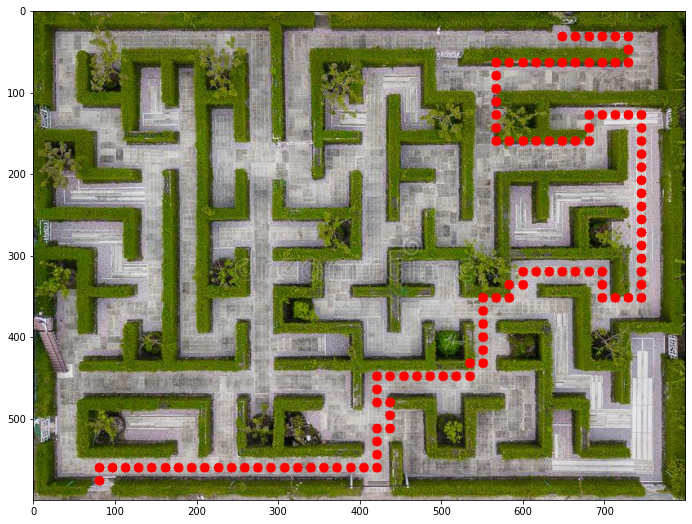

In [103]:
h_source, w_source = source_gray.shape[:2]
h_resized, w_resized = resized_img.shape[:2]
new_solution = project_solution(h_source, w_source, h_resized, w_resized, solution)
source = draw_solution(source_rgb, new_solution)
plt.imshow(source)

# Maze 3 - Test

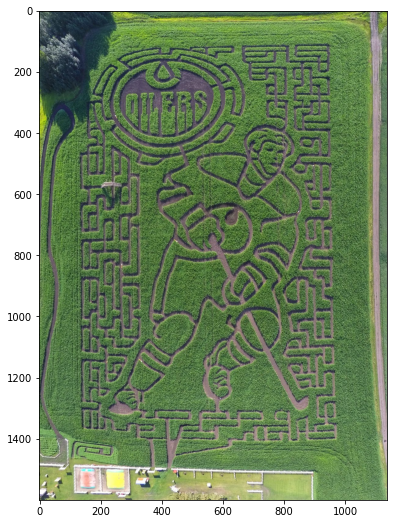

In [104]:
# MAZE 3

blur_k = 3
thresh_k = 3
erosion_k = 1
dilation_k = 1
step = 16

image2 = cv2.imread('images/maze_3.jpg') 
source_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb, cmap='gray')

In [ ]:
thresh_img = threshold(source_gray, blur_k, thresh_k)
morph_img = morphological(thresh_img, erosion_k, dilation_k)
cropped, M_inv = crop(morph_img, np.float32([[47, 38], [47, 450], [560, 38], [560, 450]]))
print(cropped.shape)
imshow(cropped, cmap='gray')

In [ ]:
resized_img = resize_image(cropped, step)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')
cv2.imwrite('images/cropped/cropped_3.jpg', image_maze_gray)

In [ ]:
start = 43, 13
finish = 84, 59

bfs = A_Star(image_maze_gray, start=start, finish=finish, heuristic='complex')
bfs.solve()

solved = bfs.draw(cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB), thickness=1)
imshow(solved)

In [ ]:
result = draw_solution_on_source_image(source_rgb, solved, M_inv)
imshow(result)

# Maze 4 - Test

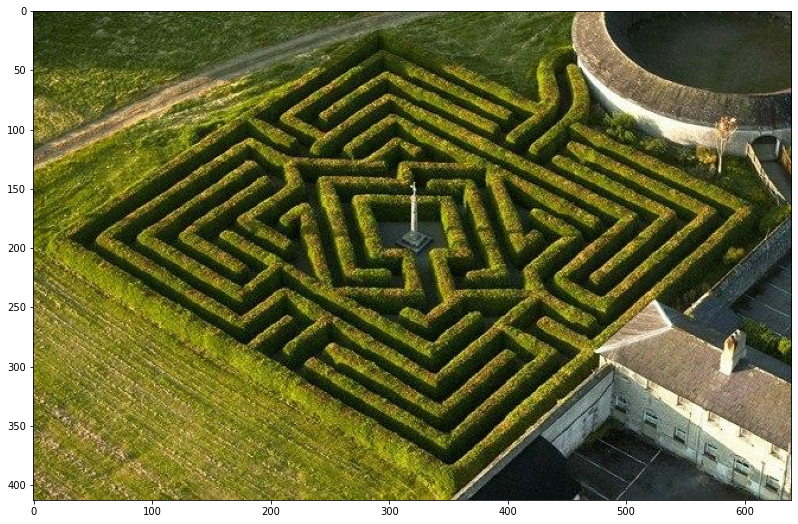

In [105]:
# MAZE 4

blur_k = 3
thresh_k = 25
erosion_k = 5
dilation_k = 5
step = 16

image2 = cv2.imread('images/maze_4.jpg') 
source_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb, cmap='gray')

(399, 60)


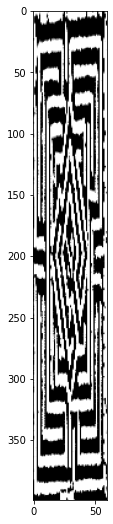

In [106]:
thresh_img = threshold(source_gray, blur_k, thresh_k)
morph_img = morphological(thresh_img, erosion_k, dilation_k)
cropped, M_inv = crop(morph_img, np.float32([[290,13], [7, 201], [615, 168], [350, 412]]))
print(cropped.shape)
imshow(cropped, cmap='gray')

In [ ]:
resized_img = resize_image(cropped, step)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')
cv2.imwrite('images/cropped/cropped_4.jpg', image_maze_gray)

In [ ]:
start = 43, 13
finish = 84, 59

bfs = A_Star(image_maze_gray, start=start, finish=finish, heuristic='complex')
bfs.solve()

solved = bfs.draw(cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB), thickness=1)
imshow(solved)

In [ ]:
result = draw_solution_on_source_image(source_rgb, solved, M_inv)
imshow(result)

# Maze 5 - Test

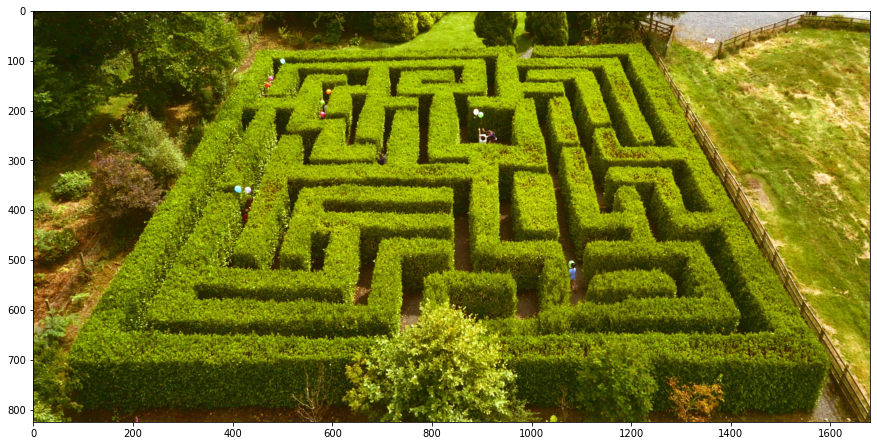

In [3]:
# MAZE 5

image2 = cv2.imread('images/maze_5.jpg') 
source_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb, cmap='gray')

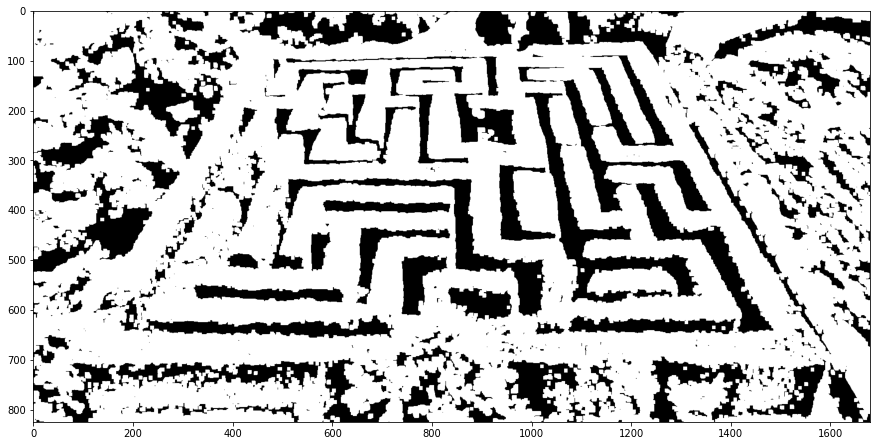

In [40]:
blur_k = 25
thresh_k = 121
erosion_k = 3
dilation_k = 7
step = 16

thresh_img = threshold(source_gray, blur_k, thresh_k)
morph_img = morphological(thresh_img, erosion_k, dilation_k)
#cropped, M_inv = crop(morph_img, np.float32([[47, 38], [47, 450], [560, 38], [560, 450]]))
#print(cropped.shape)
imshow(morph_img, cmap='gray')


In [ ]:
resized_img = resize_image(cropped, step)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')
cv2.imwrite('images/cropped/cropped_5.jpg', image_maze_gray)

In [ ]:
start = 43, 13
finish = 84, 59

bfs = A_Star(image_maze_gray, start=start, finish=finish, heuristic='complex')
bfs.solve()

solved = bfs.draw(cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB), thickness=1)
imshow(solved)

In [ ]:
result = draw_solution_on_source_image(source_rgb, solved, M_inv)
imshow(result)

# Maze 6 - Test

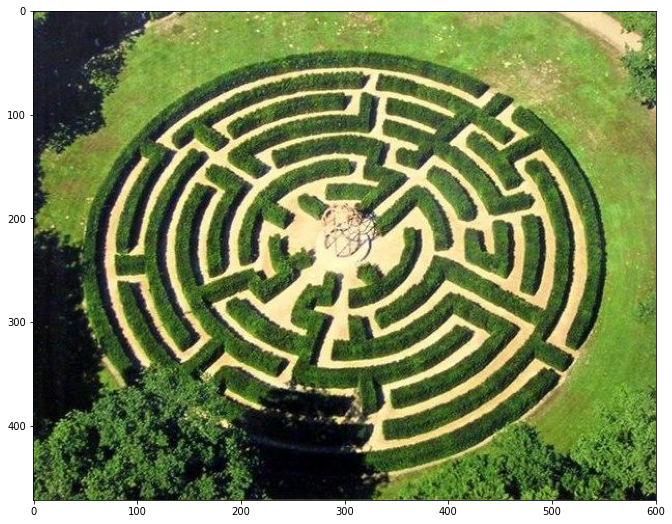

In [41]:
# MAZE 6

blur_k = 7
thresh_k = 45
erosion_k = 3
dilation_k = 3
step = 4

image2 = cv2.imread('images/maze_6.jpg') 
source_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
source_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(source_rgb)

(412, 472)


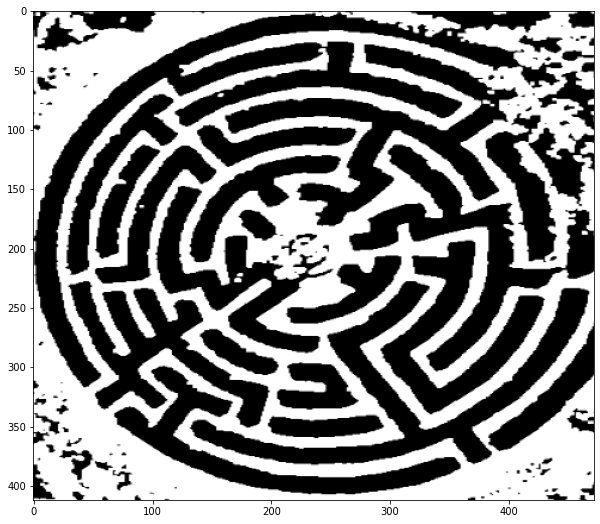

In [42]:
thresh_img = threshold(source_gray, blur_k, thresh_k)
morph_img = morphological(thresh_img, erosion_k, dilation_k)
#cropped, M_inv = crop(morph_img, np.float32([[38, 44], [450, 44], [38, 560], [450, 560]]))
cropped, M_inv = crop(morph_img, np.float32([[47, 38], [47, 450], [560, 38], [560, 450]]))
print(cropped.shape)
imshow(cropped, cmap='gray')


True

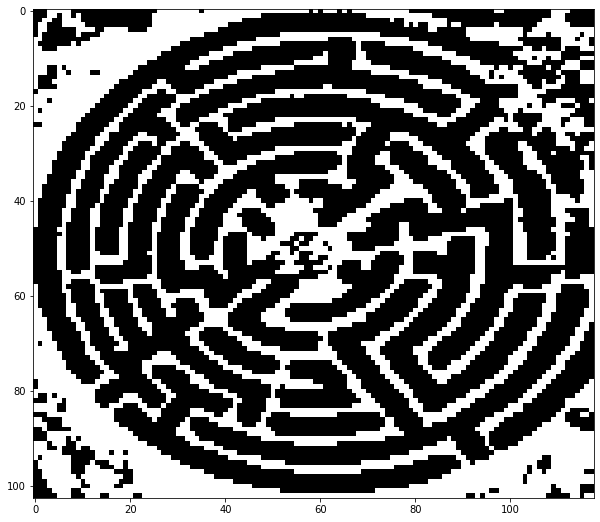

In [43]:
resized_img = resize_image(cropped, step)
image_maze_gray = np.float32(resized_img)
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(image_maze_gray, cmap='gray')
cv2.imwrite('images/cropped/cropped_6.jpg', image_maze_gray)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Solution has been found!


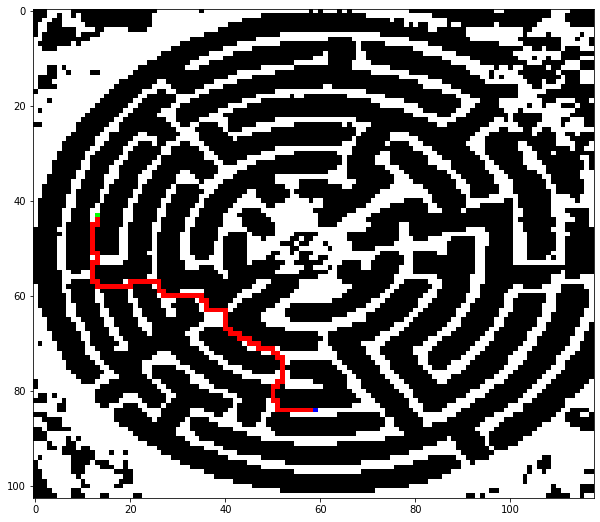

In [44]:
start = 43, 13
finish = 84, 59

bfs = A_Star(image_maze_gray, start=start, finish=finish, heuristic='complex')
bfs.solve()

solved = bfs.draw(cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB), thickness=1)
imshow(solved)

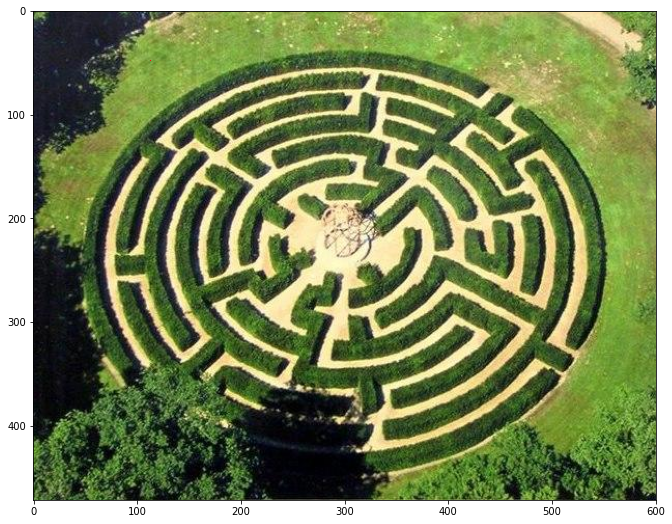

In [45]:
result = draw_solution_on_source_image(source_rgb, solved, M_inv)
imshow(result)